[15.45744717 15.96886816  0.89192385 -0.72209236  5.26307283]


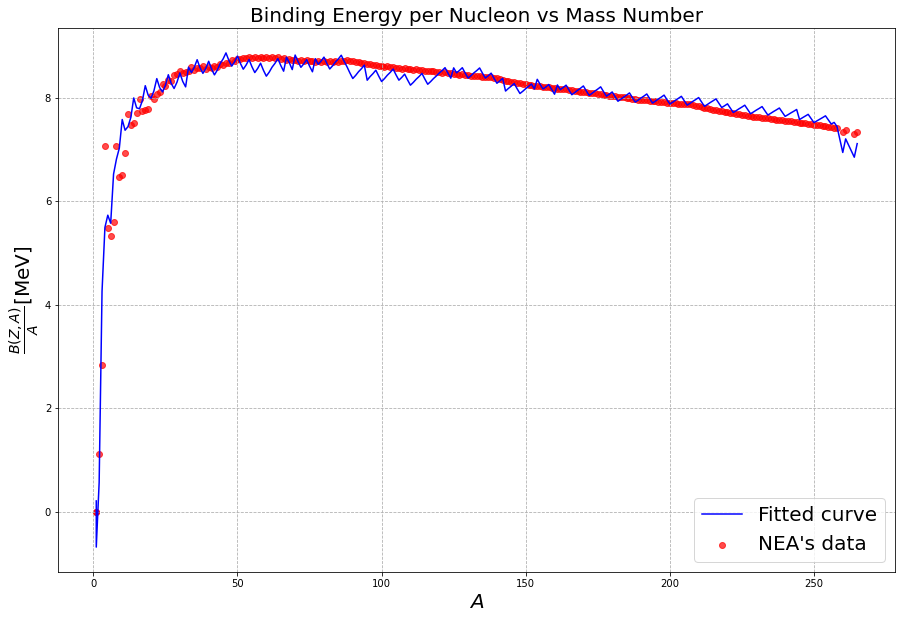

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random
from scipy.optimize import curve_fit


# Read the experimental data into a Pandas DataFrame.
df = pd.read_fwf('mass.mas03.txt', usecols=(2,3,4,11),
              names=('N', 'Z', 'A', 'avEbind'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=38,
              index_col=False)

# Extrapolated values are indicated by '#' in place of the decimal place, so
# the avEbind column won't be numeric. Coerce to float and drop these entries.
df['avEbind'] = pd.to_numeric(df['avEbind'], errors='coerce')
df = df.dropna()

# Also convert from keV to MeV.
df['avEbind'] /= 1000

# Group the DataFrame by nucleon number, A.
gdf = df.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
maxavEbind = gdf.apply(lambda t: t[t.avEbind==t.avEbind.max()])

matriz = maxavEbind.to_numpy()
N = matriz[:,0]
Z = matriz[:,1]
A = matriz[:,2]
Ebind = matriz[:,3]

def sgn(Z,A):
    N = A - Z
    signo = []
    for i in range(len(A)):
        if(Z[i]%2==0 and N[i]%2==0):
            signo.append(1)
        elif(Z[i]%2!=0 and N[i]%2!=0):
            signo.append(-1)
        else:
            signo.append(0)
    return np.array(signo)

def energias_por_nucleon(Z,A,a_v,a_s,a_c,a_a,delta):
    return a_v - a_s/(A**(1/3)) - a_c*(Z**2)/(A**(4/3)) - a_a*((A-2*Z)**2)/(A**2) + sgn(Z,A)*delta/(A**(3/2))

def f_1(Z,A):
    return np.ones(len(A))

def f_2(Z,A):
    return -1/(A**(1/3))

def f_3(Z,A):
    return -(Z**2)/(A**(4/3))

def f_4(Z,A):
    return -((A-2*Z)**2)/(A**(2))

def f_5(Z,A):
    return sgn(Z,A)/(A**(3/2))

def inner_product(f,g,Z,A):
    return np.sum(f(Z,A)*g(Z,A))

matriz = maxavEbind.to_numpy()
N = matriz[:,0]
Z = matriz[:,1]
A = matriz[:,2]
Ebind = matriz[:,3]

m = 5
functions = np.array([f_1,f_2,f_3,f_4,f_5])
M_least = np.zeros((m,m))
v_least = np.zeros(m)

for i, function1 in enumerate(functions):
    for j, function2 in enumerate(functions):
        M_least[i,j] = inner_product(function1,function2,Z,A)

for i, function in enumerate(functions):
    v_least[i] = np.sum(function(Z,A)*Ebind)


lambdas = np.linalg.solve(M_least,v_least)
print(lambdas)

figura = plt.figure(figsize=(15,10))
best_E = energias_por_nucleon(Z,A,lambdas[0],lambdas[1],lambdas[2],lambdas[3],lambdas[4])
plt.grid(b=True, linestyle='--')
plt.scatter(A,Ebind, alpha=0.7, color="red", label='NEA\'s data')
plt.plot(A, best_E, color="blue", label="Fitted curve")
plt.xlabel(r'$A$', fontsize=20)
plt.ylabel(r'$\frac{B(Z,A)}{A}[\mathrm{MeV}]$', fontsize=20)
plt.title("Binding Energy per Nucleon vs Mass Number", fontsize=20)
plt.legend(fontsize=20)
plt.savefig("LS1.png")
#plt.show()

In [8]:
maxavEbind_n = maxavEbind[(maxavEbind.avEbind>= 7.0)]
matriz = maxavEbind_n.to_numpy()
N = matriz[:,0]
Z = matriz[:,1]
A = matriz[:,2]
Ebind = matriz[:,3]

[15.57917163 17.41725517  0.69363898 23.26436144 22.48927204]


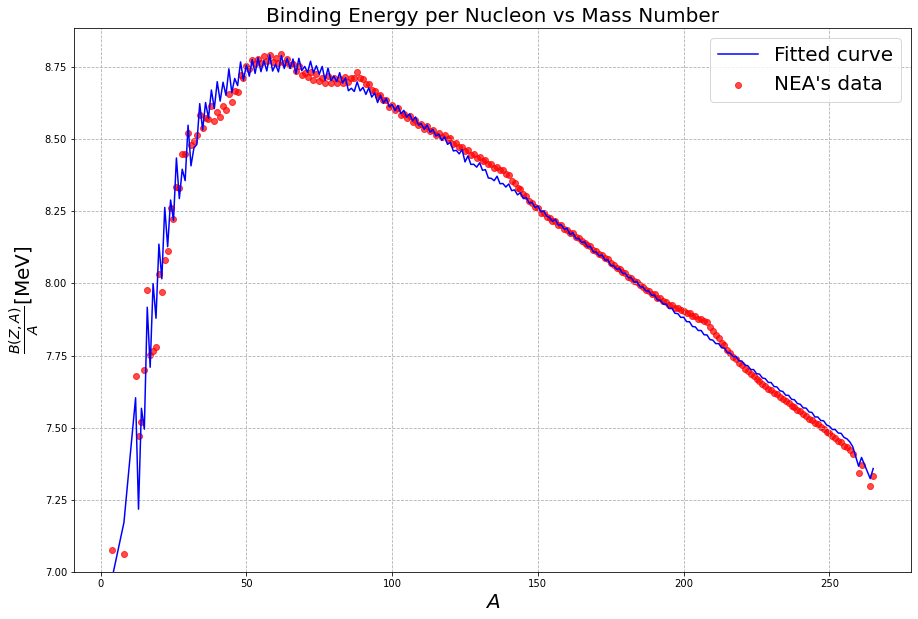

In [9]:
m = 5
functions = np.array([f_1,f_2,f_3,f_4,f_5])
M_least = np.zeros((m,m))
v_least = np.zeros(m)

for i, function1 in enumerate(functions):
    for j, function2 in enumerate(functions):
        M_least[i,j] = inner_product(function1,function2,Z,A)

for i, function in enumerate(functions):
    v_least[i] = np.sum(function(Z,A)*Ebind)


lambdas = np.linalg.solve(M_least,v_least)
print(lambdas)

figura = plt.figure(figsize=(15,10))
best_E = energias_por_nucleon(Z,A,lambdas[0],lambdas[1],lambdas[2],lambdas[3],lambdas[4])
plt.grid(b=True, linestyle='--')
plt.scatter(A,Ebind, alpha=0.7, color="red", label='NEA\'s data')
plt.plot(A, best_E, color="blue", label="Fitted curve")
plt.xlabel(r'$A$', fontsize=20)
plt.ylabel(r'$\frac{B(Z,A)}{A}[\mathrm{MeV}]$', fontsize=20)
plt.title("Binding Energy per Nucleon vs Mass Number", fontsize=20)
plt.ylim(ymin=7)
plt.legend(fontsize=20)
plt.savefig("LS2.png")
#plt.show()